<a href="https://colab.research.google.com/github/joeyeuron/Case-Study-CE880/blob/main/Draft3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [30]:
import numpy as np # linear algebra
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 

# Import Dataset

In [31]:

from google.colab import files
uploaded = files.upload()

Saving data_banknote_authentication.txt to data_banknote_authentication (1).txt


In [32]:
df=pd.read_csv('data_banknote_authentication.txt')
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [33]:
# view dimensions of dataset
df.shape

(1371, 5)

# Rename columns

In [34]:
col_names = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
df.columns = col_names
col_names

['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']

In [35]:
#second preview of the data
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [36]:
df.tail()

,Variance,Skewness,Kurtosis,Entropy,Class
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1
1370,-2.54190,-0.65804,2.6842,1.19520,1


# Summary of the Dataset

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1371 non-null   float64
 1   Skewness  1371 non-null   float64
 2   Kurtosis  1371 non-null   float64
 3   Entropy   1371 non-null   float64
 4   Class     1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


# Frequency distribution of values in the variables

In [38]:
col_names = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
for col in col_names:
    print(df[col].value_counts())   


 0.57060    5
 0.51950    4
 0.37980    4
 0.32920    4
-1.30000    3
           ..
 0.87256    1
 0.18480    1
 4.57070    1
 2.97420    1
-2.54190    1
Name: Variance, Length: 1337, dtype: int64
-4.45520    6
-3.26330    5
-0.02480    4
 0.70980    4
-3.79710    4
           ..
 7.92120    1
 8.81100    1
 6.40230    1
 7.27970    1
-0.65804    1
Name: Skewness, Length: 1255, dtype: int64
 1.2421    5
 4.5718    5
 3.0895    5
 0.7572    4
 4.6429    3
          ..
-2.0439    1
 1.0588    1
-0.7843    1
-2.9024    1
 2.6842    1
Name: Kurtosis, Length: 1269, dtype: int64
-0.98880    5
-0.29570    5
 0.32110    4
-0.56210    4
-0.44440    4
           ..
-0.44182    1
-0.24010    1
-1.30820    1
-3.27240    1
-2.77710    1
Name: Entropy, Length: 1156, dtype: int64
0    761
1    610
Name: Class, dtype: int64


# Summary of Variables

# Explore Class Variable

In [39]:
df['Class'].value_counts()

0    761
1    610
Name: Class, dtype: int64

# Missing value check

In [40]:
#check for missing value sin the variables
df.isnull().sum()

Variance    0
Skewness    0
Kurtosis    0
Entropy     0
Class       0
dtype: int64

# Declare feature vectors and target variables

In [41]:
X = df.drop(['Class'], axis=1)
y = df['Class']

# split data into seperate training and test set

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [43]:
#check shape
X_train.shape, X_test.shape

((918, 4), (453, 4))

# feature engineering

In [44]:
# check data types in X_train
X_train.dtypes

Variance    float64
Skewness    float64
Kurtosis    float64
Entropy     float64
dtype: object

# Decision Tree Classifier with criterion gini index

In [45]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

# Predict the Test set results with criterion gini index

In [46]:
y_pred_gini = clf_gini.predict(X_test)

# Check accuracy score with criterion gini index

In [47]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9294


# Compare the train-set and test-set accuracy

In [48]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,

In [49]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9412


# Check for overfitting and underfitting

In [50]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9412
Test set score: 0.9294


# Visualize decision-trees

[Text(0.5, 0.875, 'X[0] <= 0.272\ngini = 0.495\nsamples = 918\nvalue = [504, 414]'),
 Text(0.25, 0.625, 'X[1] <= 7.565\ngini = 0.297\nsamples = 441\nvalue = [80, 361]'),
 Text(0.125, 0.375, 'X[0] <= -0.547\ngini = 0.126\nsamples = 370\nvalue = [25, 345]'),
 Text(0.0625, 0.125, 'gini = 0.07\nsamples = 305\nvalue = [11, 294]'),
 Text(0.1875, 0.125, 'gini = 0.338\nsamples = 65\nvalue = [14, 51]'),
 Text(0.375, 0.375, 'X[0] <= -3.954\ngini = 0.349\nsamples = 71\nvalue = [55, 16]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 55\nvalue = [55, 0]'),
 Text(0.75, 0.625, 'X[2] <= -4.381\ngini = 0.198\nsamples = 477\nvalue = [424, 53]'),
 Text(0.625, 0.375, 'X[1] <= 7.331\ngini = 0.32\nsamples = 30\nvalue = [6, 24]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.875, 0.375, 'X[0] <= 1.45\ngini = 0.121\nsamples = 447\nvalue = [418, 29]')

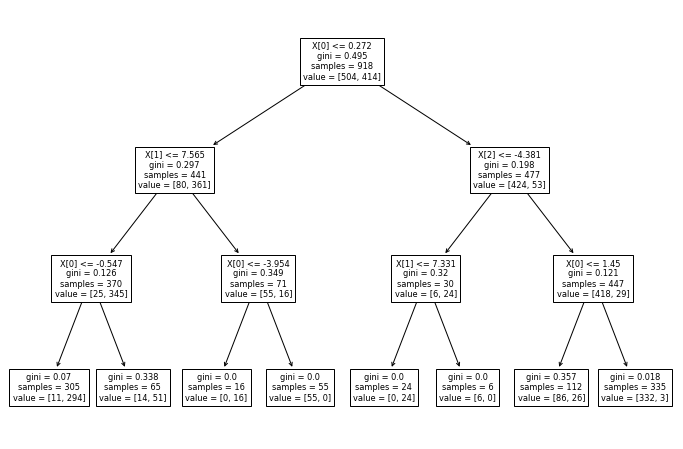

In [51]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# Random Forest Classifier model with default parameters

In [52]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9868


# Random Forest Classifier model with parameter n_estimators=100

In [53]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9868


# Find important features with Random Forest model

In [54]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [55]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, 
                           index=X_train.columns).sort_values(ascending=False)
feature_scores

Variance    0.561915
Skewness    0.226003
Kurtosis    0.154263
Entropy     0.057819
dtype: float64

Most important is variance and least important is entropy

# Visualize feature scores of the features

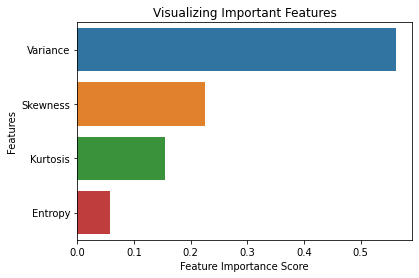

In [56]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

# Build Random Forest model on selected features

In [59]:
# declare feature vector and target variable
X = df.drop(['Class', 'Entropy'], axis=1) # dropping least important feature
y = df['Class']

In [60]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [61]:
#Now, I will build the random forest model and check accuracy.
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score 
print('Model accuracy score with Entropy variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with Entropy variable removed : 0.9845


# Confusion matrix

In [62]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[254   3]
 [  4 192]]


# Classification Report

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       257
           1       0.98      0.98      0.98       196

    accuracy                           0.98       453
   macro avg       0.98      0.98      0.98       453
weighted avg       0.98      0.98      0.98       453

